<a href="https://colab.research.google.com/github/Koo23B2058/Before-and-after-image-filtering.ipynb/blob/main/samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Device set to use cpu


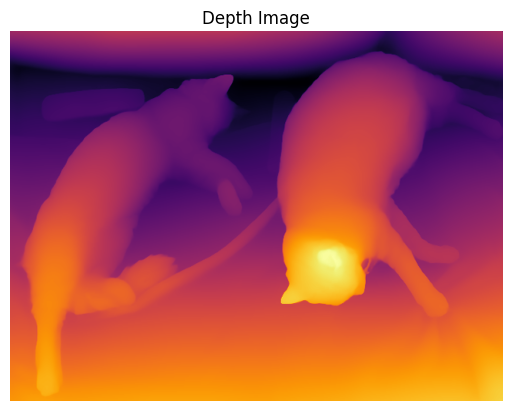

In [4]:
from transformers import pipeline
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt

# load pipe
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

# load image
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# inference
depth = pipe(image)["depth"]

# Convert to numpy array
depth_array = np.array(depth)


# Normalize for visualization
depth_normalized = (depth_array - depth_array.min()) / (depth_array.max() - depth_array.min())

# Save depth image
plt.imsave("disparity_map_image1.png", depth_normalized, cmap='inferno')

# Display in notebook
plt.imshow(depth_normalized, cmap='inferno')
plt.axis('off')  # Optional: hides axis ticks
plt.title("Depth Image")
plt.show()


Saving IMG_8213.JPG to IMG_8213.JPG


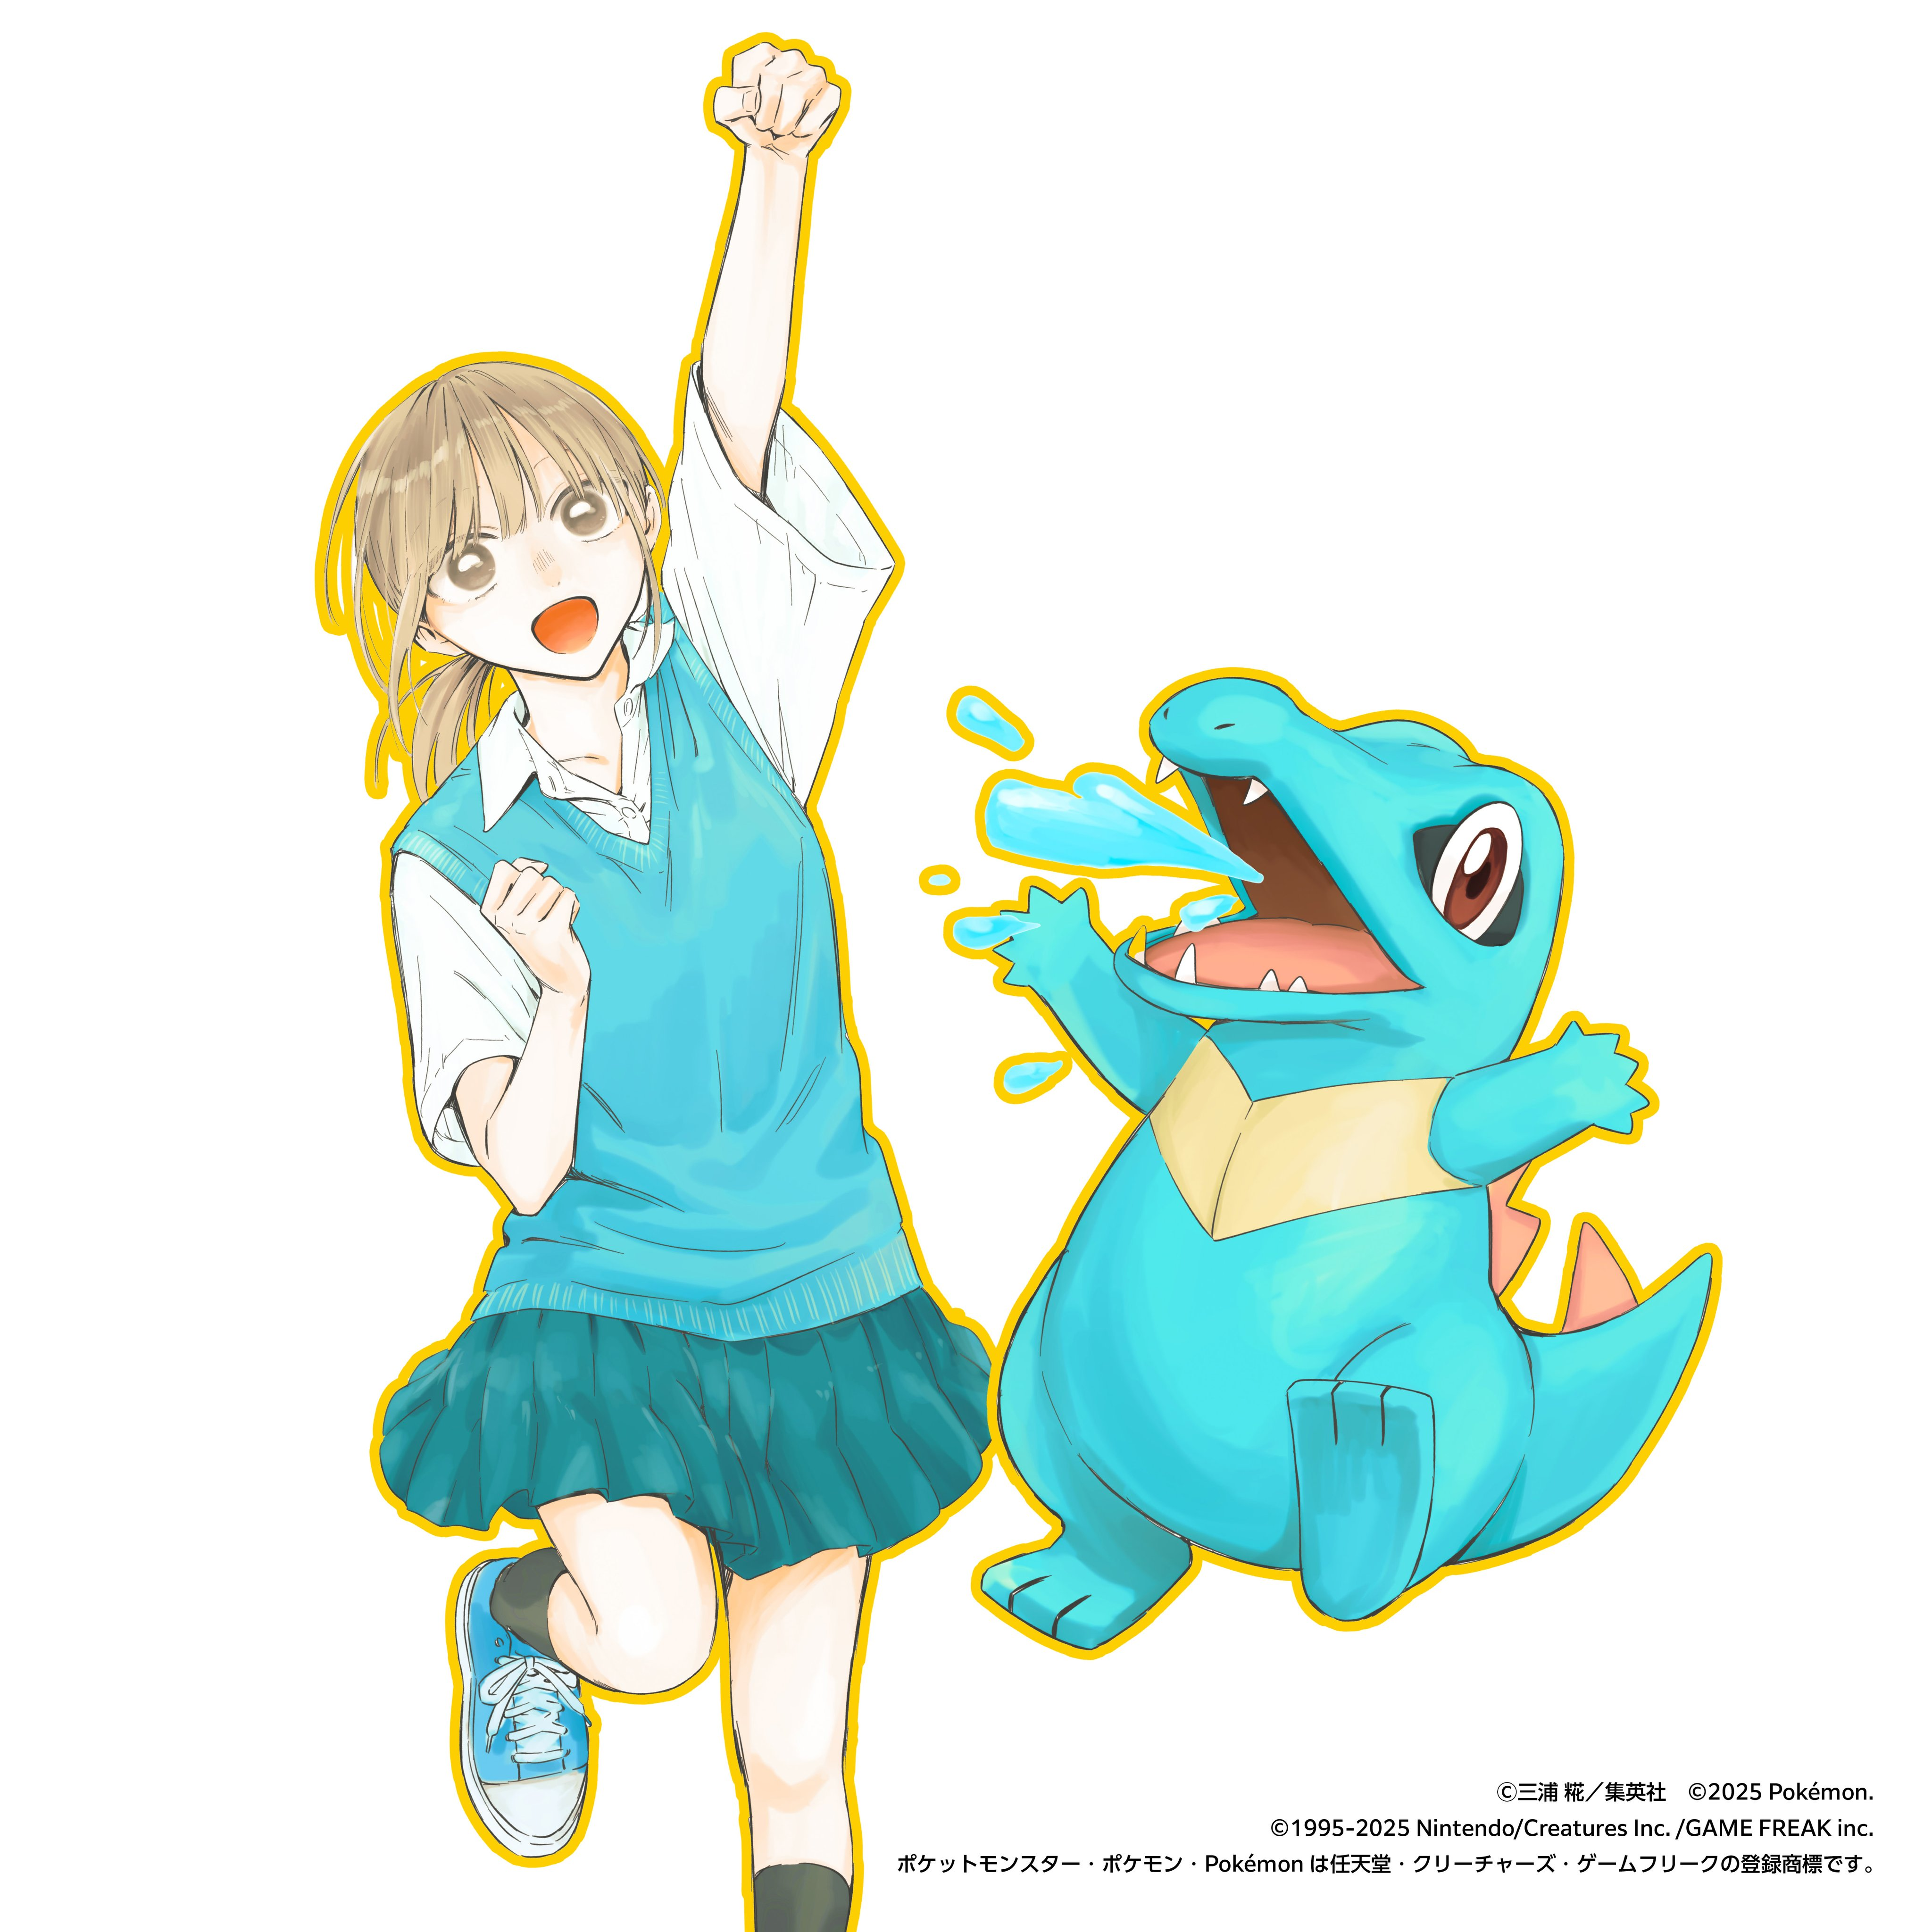

Device set to use cpu


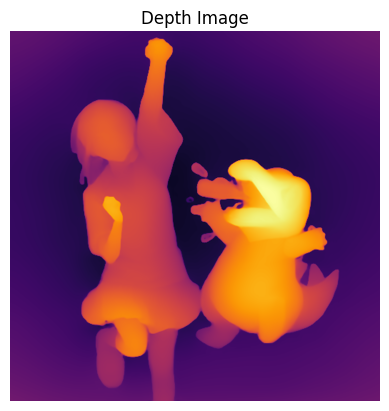

In [6]:

from IPython.display import display
from google.colab import files

# Upload image interactively
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)

# Display the image
display(image)

# Load depth estimation pipeline
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

# Run inference
depth = pipe(image)["depth"]

# Convert to NumPy array and normalize
depth_array = np.array(depth)
depth_normalized = (depth_array - depth_array.min()) / (depth_array.max() - depth_array.min())

# Save depth image
plt.imsave("disparity_map_image2.png", depth_normalized, cmap='inferno')

# Show depth image
plt.imshow(depth_normalized, cmap='inferno')
plt.axis('off')
plt.title("Depth Image")
plt.show()
